# Music recomendation system and genre prediction

# Table of Contents

- [Introduction](#Introduction)
- [Data Cleaning and Preparation](#data-cleaning-and-preparation)
- [Exploratory analyssis](#Exploratory-analyssis)
- [Genre Classification](#Genre-classification)
    - [Decision tree](##Decision-tree)
    - [Random forest](##Random-forest)
    - [Kmeans clusterization](##Kmeans-clusterization)
    - [PCA dimensionality reduction with random forest](##PCA-dimensionality-reduction-with-random-forest)
    - [Neuronal network](##neuronal-network)
- [Songs recomendation](#Songs-recomendation)
    - [KNN](##Using-KNN)
    - [Cosine similarity](##Cosine-similarity)
    - [Recomendation with Autoencoder (Neuronal network)](##Recomendation-with-Autoencoder-(Neuronal-network))
-   [Conclusion](#conclusion)


### Introduction
In the era of digital music streaming, the availability of extensive song libraries and personalized recommendations has revolutionized the way we discover and enjoy music. Spotify,\
 one of the leading music streaming platforms, offers users access to millions of tracks across a wide array of genres.\
  The challenge, however, lies in efficiently categorizing these tracks by genre and providing users with accurate and personalized song recommendations.

In this project, we leverage the spotify_songs.csv dataset, sourced from Kaggle, which comprises a rich collection of 30,000 songs with various audio features and metadata.\
 Our objectives are twofold:

Data Cleaning and Preparation: We will begin by meticulously cleaning and preparing the dataset.\
 This includes handling missing values, normalizing data, and transforming features to ensure they are suitable for machine learning models.

Genre Prediction Model: Using machine learning and neural network techniques, we will build and evaluate several models to predict the genre of a song based on its audio features.\
 Our goal is to identify the most accurate model through comparative analysis.

Song Recommendation Model: Beyond genre classification, we aim to develop a song recommendation system. \
By analyzing patterns and similarities in the dataset, we will create a model that can suggest songs to users based on their listening history and preferences.

To achieve these goals, we will explore a variety of machine learning algorithms and neural network architectures,\
 including but not limited to logistic regression, decision trees, random forests, k-nearest neighbors, support vector machines, and deep learning models.\
  By comparing the performance of these models, we will select the most effective approaches for genre prediction and song recommendation.

Through this project, we not only aim to enhance our understanding and skills in data science and machine learning but also to contribute to the evolving field of music recommendation systems.\
 The insights gained and the models developed here can potentially be applied to improve user experience on music streaming platforms like Spotify, offering users more personalized and engaging music discovery journeys.


### Importing necessary libreries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.utils import to_categorical # type: ignore
from keras.callbacks import EarlyStopping # type: ignore
from keras.optimizers import Adam # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras import layers, models # type: ignore
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import plot_tree

In [3]:
# hide warnings
import warnings 
warnings.filterwarnings('ignore')

## Data cleaning and preparation

In [4]:
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
# sumirize df
df.describe()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
# select rows with nulls
df[df.isnull().any(axis=1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [7]:
# calculate percentaje of nulls by column
null_count = df.isnull().sum()
null_count

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [8]:
# just 5 songs in the whole dataset have missing data
print(f"Percent of sopngs with no data: {round(5/32833,4)}%")

Percent of sopngs with no data: 0.0002%


In [9]:
# fill nan with unknown
dfClean = df.fillna('unknown')

In [10]:
df.shape

(32833, 23)

In [11]:
# getting year from track_albun release date and droping original column
dfClean['original_date'] = dfClean['track_album_release_date']
dfClean['track_album_release_date'] = pd.to_datetime(dfClean['track_album_release_date'], errors='coerce')
mask = dfClean['track_album_release_date'].isna()
dfClean.loc[mask, 'track_album_release_date'] = pd.to_datetime(dfClean.loc[mask, 'original_date'].str[:4], format='%Y', errors='coerce')
dfClean['year'] = dfClean['track_album_release_date'].dt.year
dfClean.drop('original_date', axis=1, inplace=True)
dfClean.drop('track_album_release_date', inplace=True, axis=1)

In [12]:
# checking for duplicates
dfClean.duplicated('track_id').sum()

4477

In [13]:
dfClean.drop_duplicates('track_id', inplace=True)

In [14]:
dfClean.isnull().sum()

track_id             0
track_name           0
track_artist         0
track_popularity     0
track_album_id       0
track_album_name     0
playlist_name        0
playlist_id          0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
year                 0
dtype: int64

In [15]:
dfClean.shape

(28356, 23)

# Exploratory analyssis

In [16]:
dfClean.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.00000,28356.000000,28356.000000
mean,39.329771,0.653372,0.698388,5.368000,-6.817696,0.565489,0.107954,0.177176,0.091117,0.190958,0.510387,120.95618,226575.967026,2011.054027
std,23.702376,0.145785,0.183503,3.613904,3.036243,0.495701,0.102556,0.222803,0.232548,0.155894,0.234340,26.95456,61078.450819,11.229221
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4000.000000,1957.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309250,0.000000,0.041000,0.014375,0.000000,0.092600,0.329000,99.97200,187742.000000,2008.000000
50%,42.000000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.99300,216933.000000,2016.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.709000,1.000000,0.133000,0.260000,0.006570,0.249000,0.695000,133.99900,254975.250000,2019.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.44000,517810.000000,2020.000000


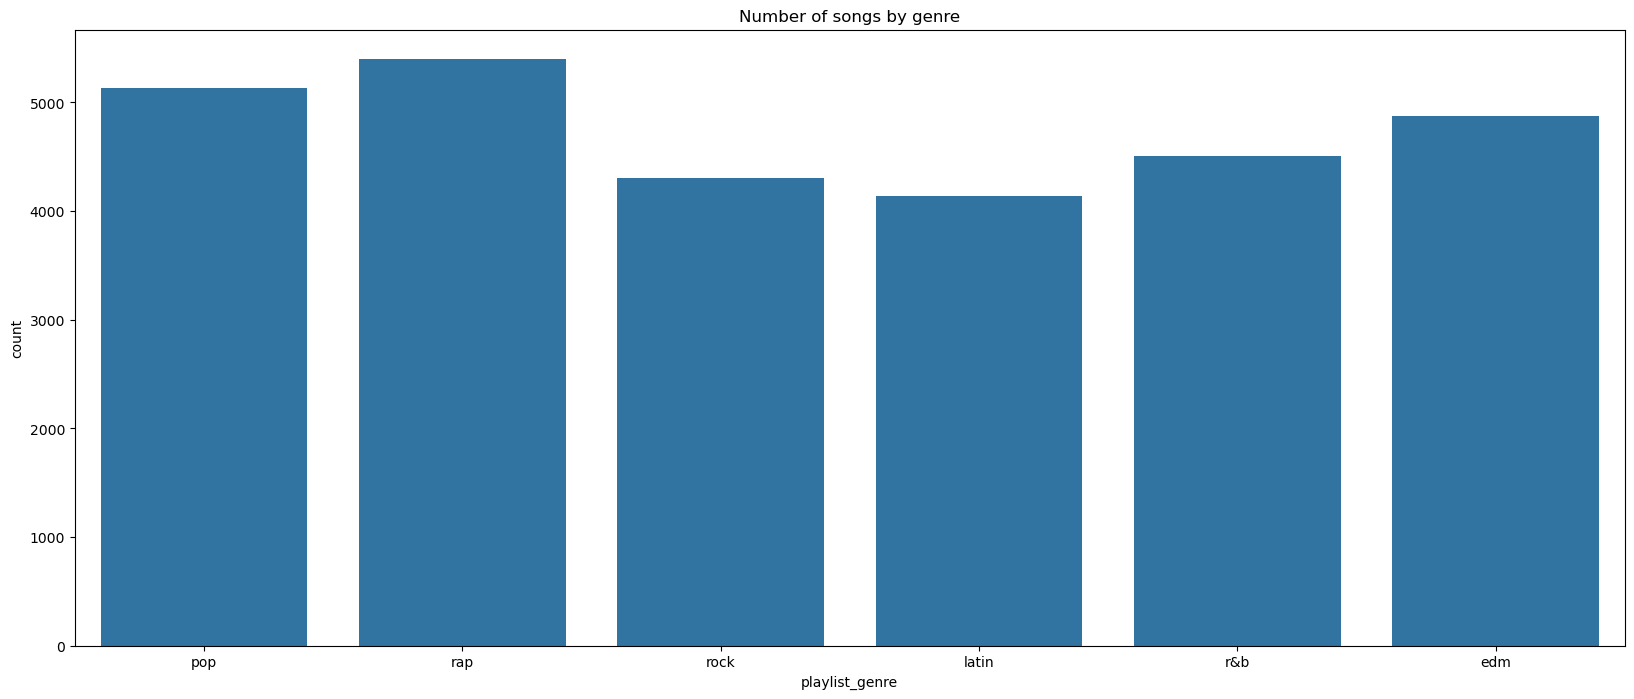

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(x='playlist_genre', data=dfClean)
plt.title('Number of songs by genre')
plt.show()

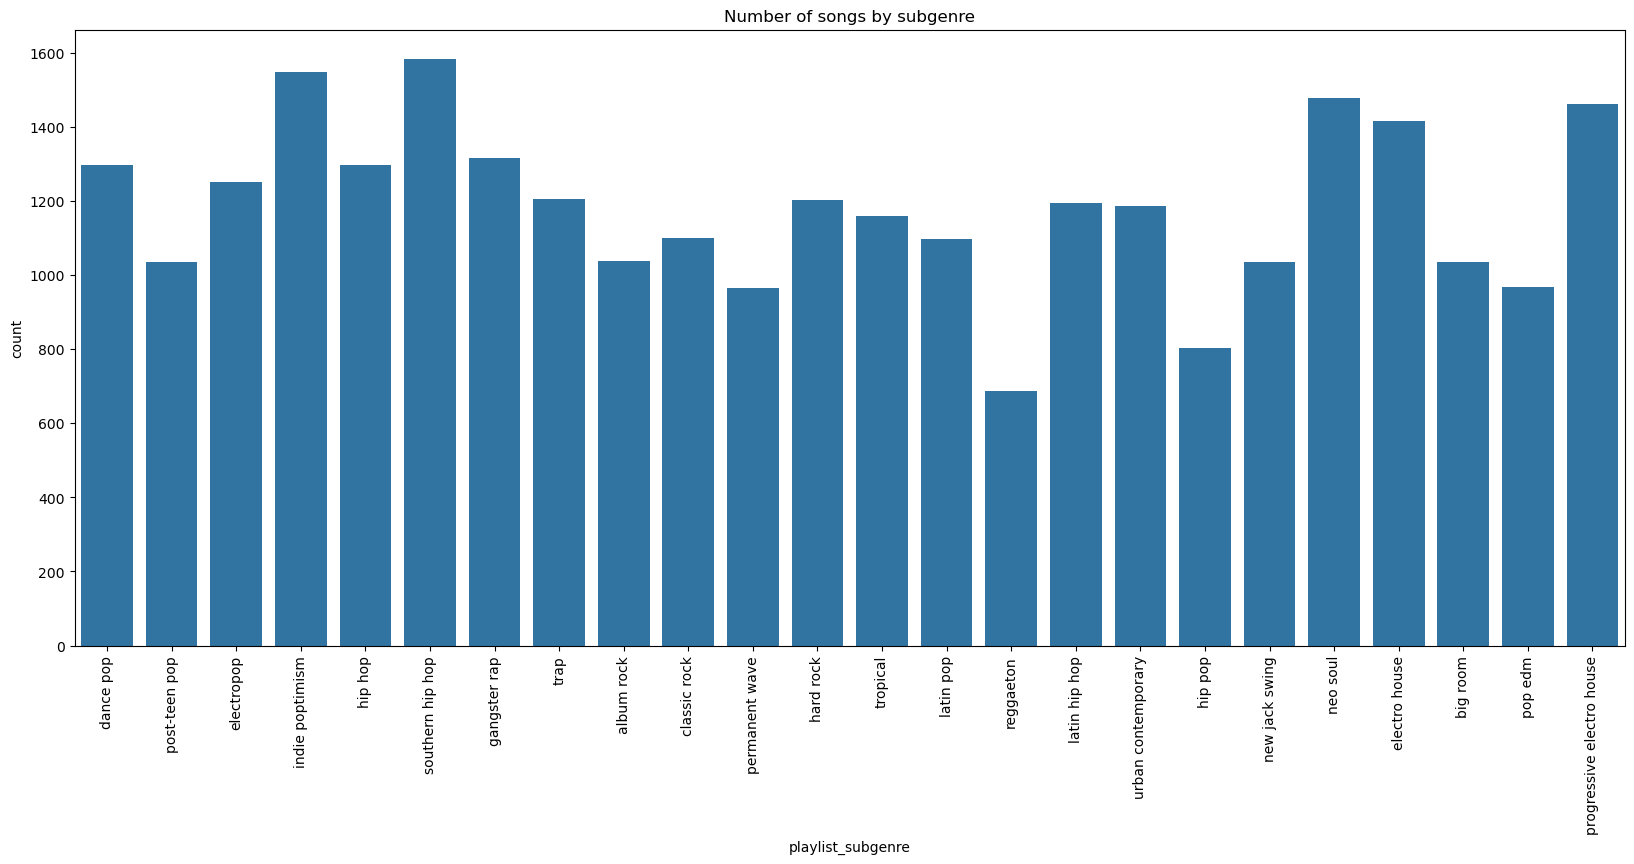

In [18]:

plt.figure(figsize=(20,8))
sns.countplot(x='playlist_subgenre', data=dfClean)
plt.xticks(rotation=90)
plt.title('Number of songs by subgenre')
plt.show()

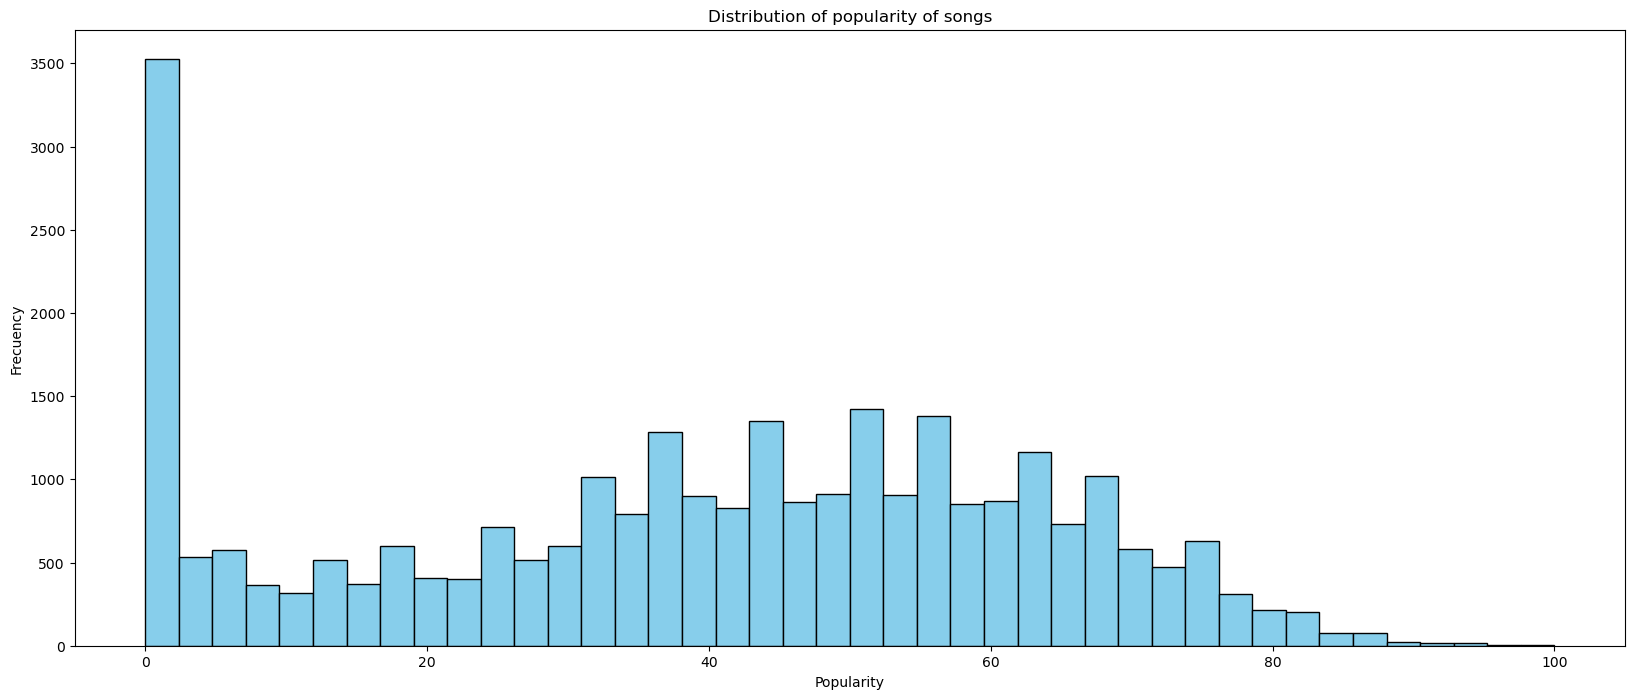

In [19]:
plt.figure(figsize=(20,8))
plt.hist(dfClean['track_popularity'], bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frecuency')
plt.title('Distribution of popularity of songs')
plt.show()

In [44]:
# calculating median and mean
popularity_median = dfClean['track_popularity'].median()
popularity_mean = dfClean['track_popularity'].mean()
print(f"Popularity median: {popularity_median}")
print(f"Popularity mean: {popularity_mean}")

Popularity median: 42.0
Popularity mean: 39.329771476936095


In [20]:
# getting nummeric variables and encoding the genre
le = LabelEncoder()
data_for_model = dfClean.drop(dfClean.select_dtypes(include=['object']) , axis=1)
data_for_model['playlist_genre'] = le.fit_transform(dfClean['playlist_genre'])
data_for_model

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,playlist_genre
0,66,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,2
1,67,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,2
2,70,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,2
3,60,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,2
4,69,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,0
32829,20,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,0
32830,14,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,0
32831,15,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,0


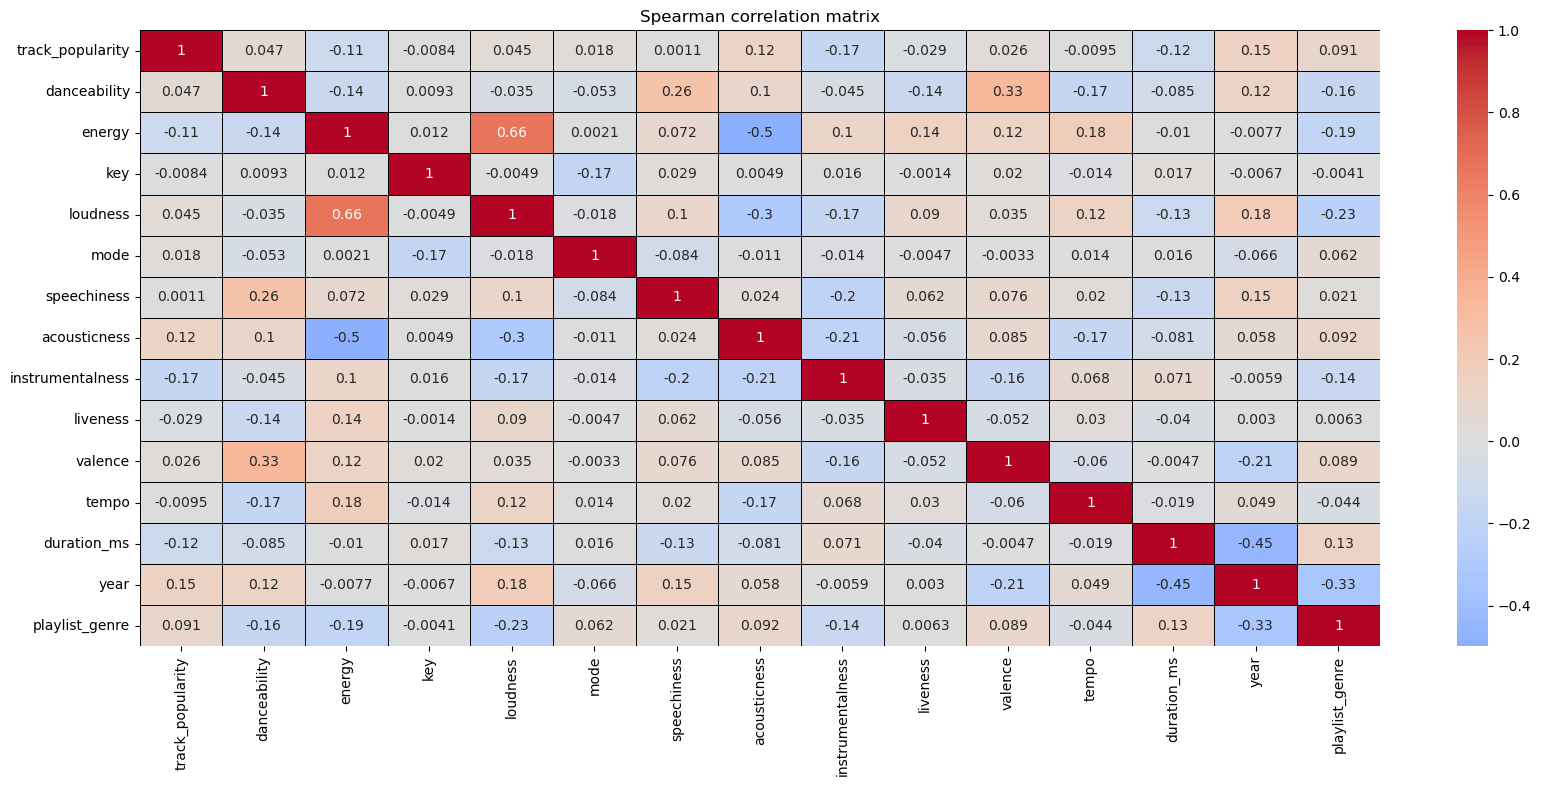

In [21]:

from scipy.stats import spearmanr
df_spermanr = pd.DataFrame(data_for_model)

# Calcular la matriz de correlación de Spearman
corr_matrix = df_spermanr.corr(method='spearman')

# Crear el mapa de calor
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Spearman correlation matrix')
plt.show()

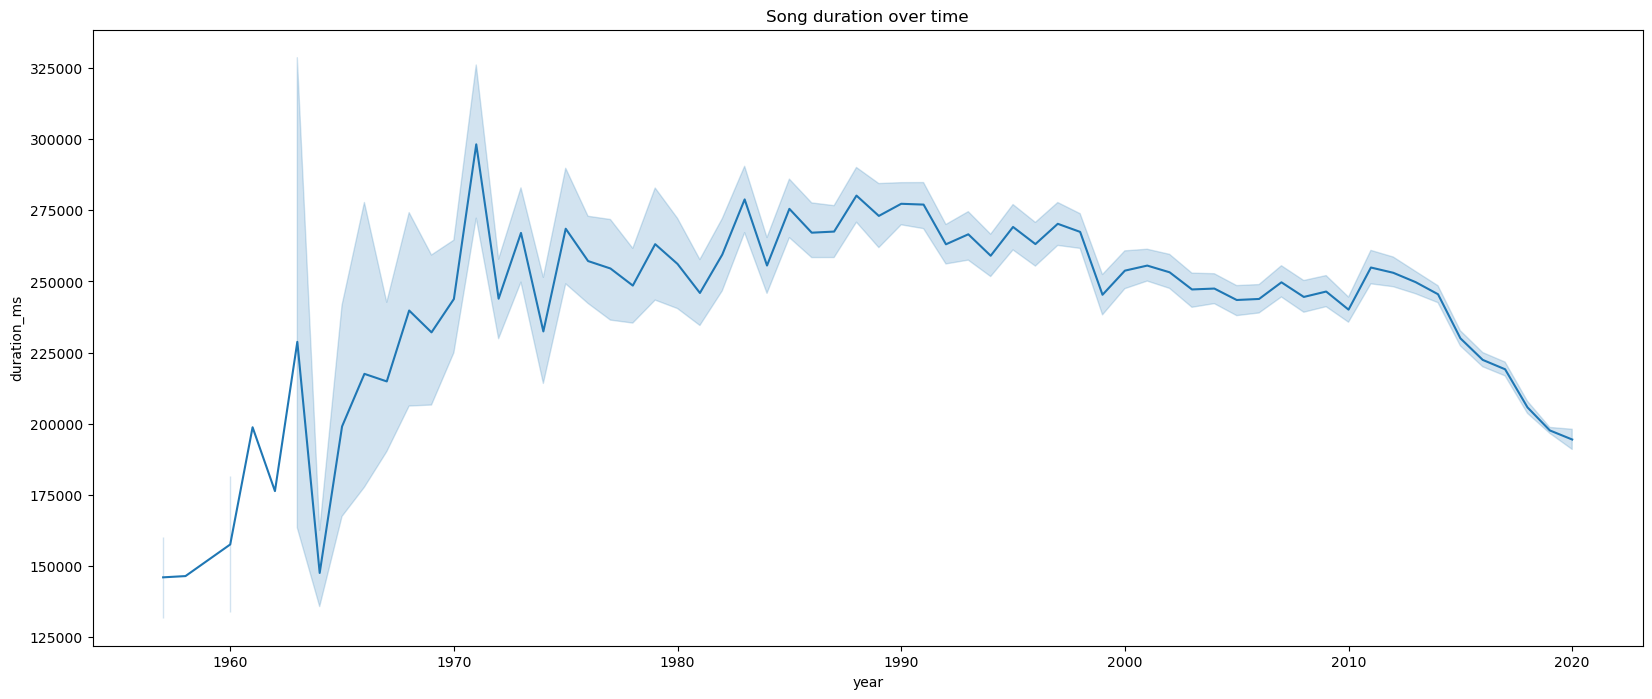

In [22]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='year', y='duration_ms', data=dfClean)
plt.title('Song duration over time')
plt.show()

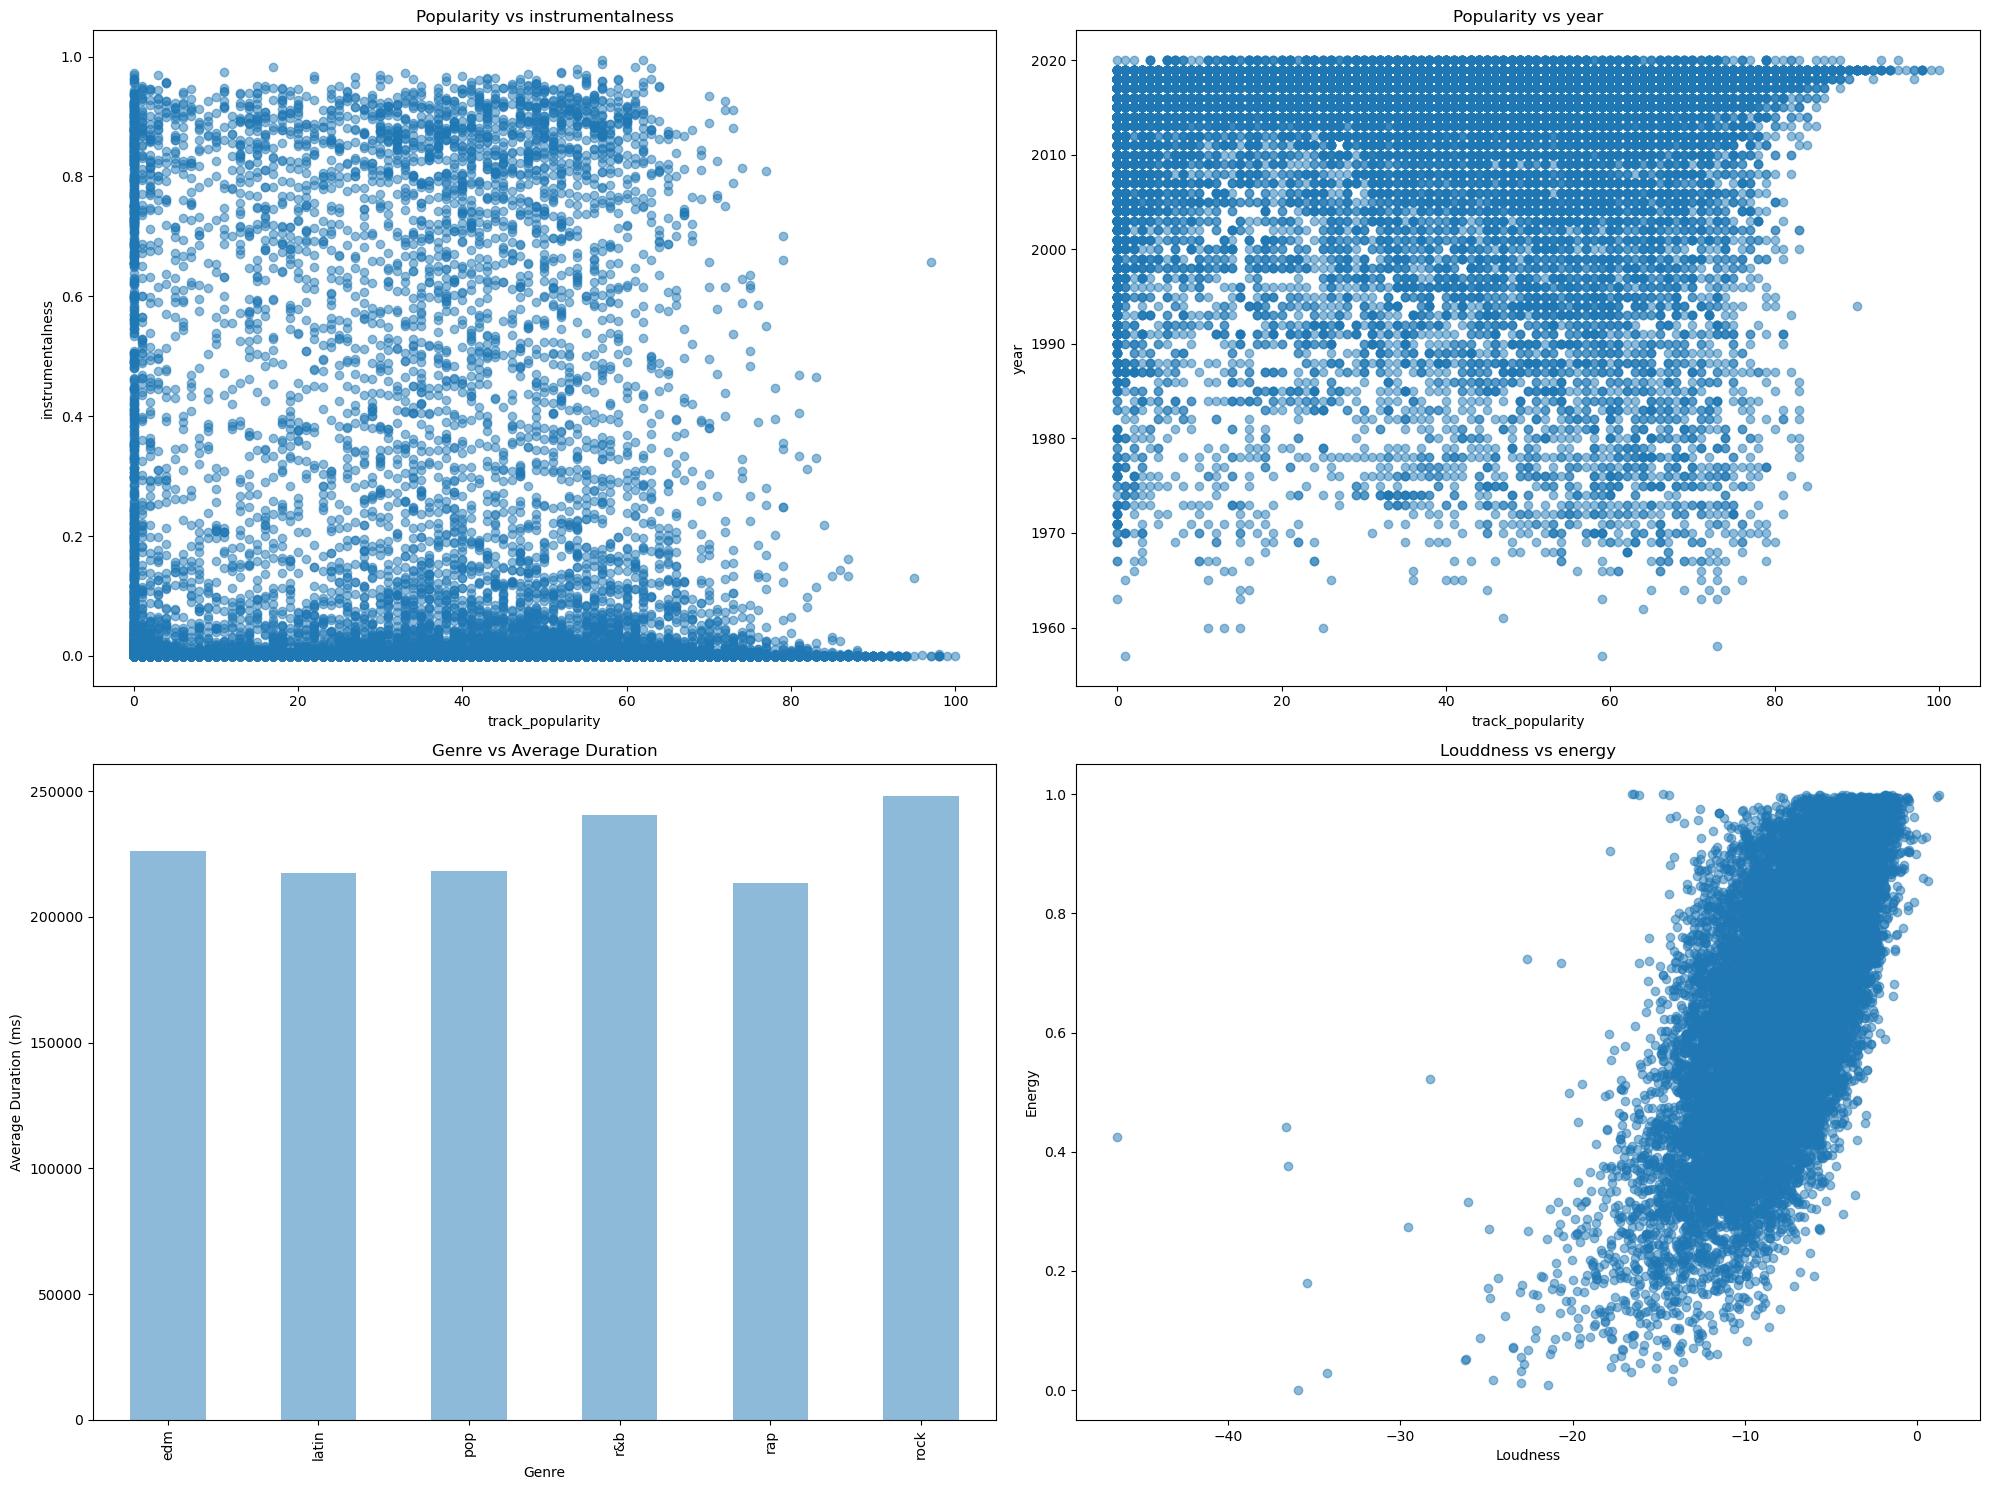

In [23]:
# Creating a grid most correlated variables
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Popularity vs energy
axs[0, 0].scatter(dfClean['track_popularity'], dfClean['instrumentalness'], alpha=0.5)
axs[0, 0].set_title('Popularity vs instrumentalness')
axs[0, 0].set_xlabel('track_popularity')
axs[0, 0].set_ylabel('instrumentalness')

# Popularity vs year
axs[0, 1].scatter(dfClean['track_popularity'], dfClean['year'], alpha=0.5)
axs[0, 1].set_title('Popularity vs year')
axs[0, 1].set_xlabel('track_popularity')
axs[0, 1].set_ylabel('year')

# Genre vs duration
avg_duration_by_genre = dfClean.groupby('playlist_genre')['duration_ms'].mean()
avg_duration_by_genre.plot(kind='bar', ax=axs[1, 0], alpha=0.5)
axs[1, 0].set_title('Genre vs Average Duration')
axs[1, 0].set_xlabel('Genre')
axs[1, 0].set_ylabel('Average Duration (ms)')

# Loudness vs energy
axs[1, 1].scatter(dfClean['loudness'], dfClean['energy'], alpha=0.5)
axs[1, 1].set_title('Louddness vs energy')
axs[1, 1].set_xlabel('Loudness')
axs[1, 1].set_ylabel('Energy')


plt.tight_layout()
plt.show()

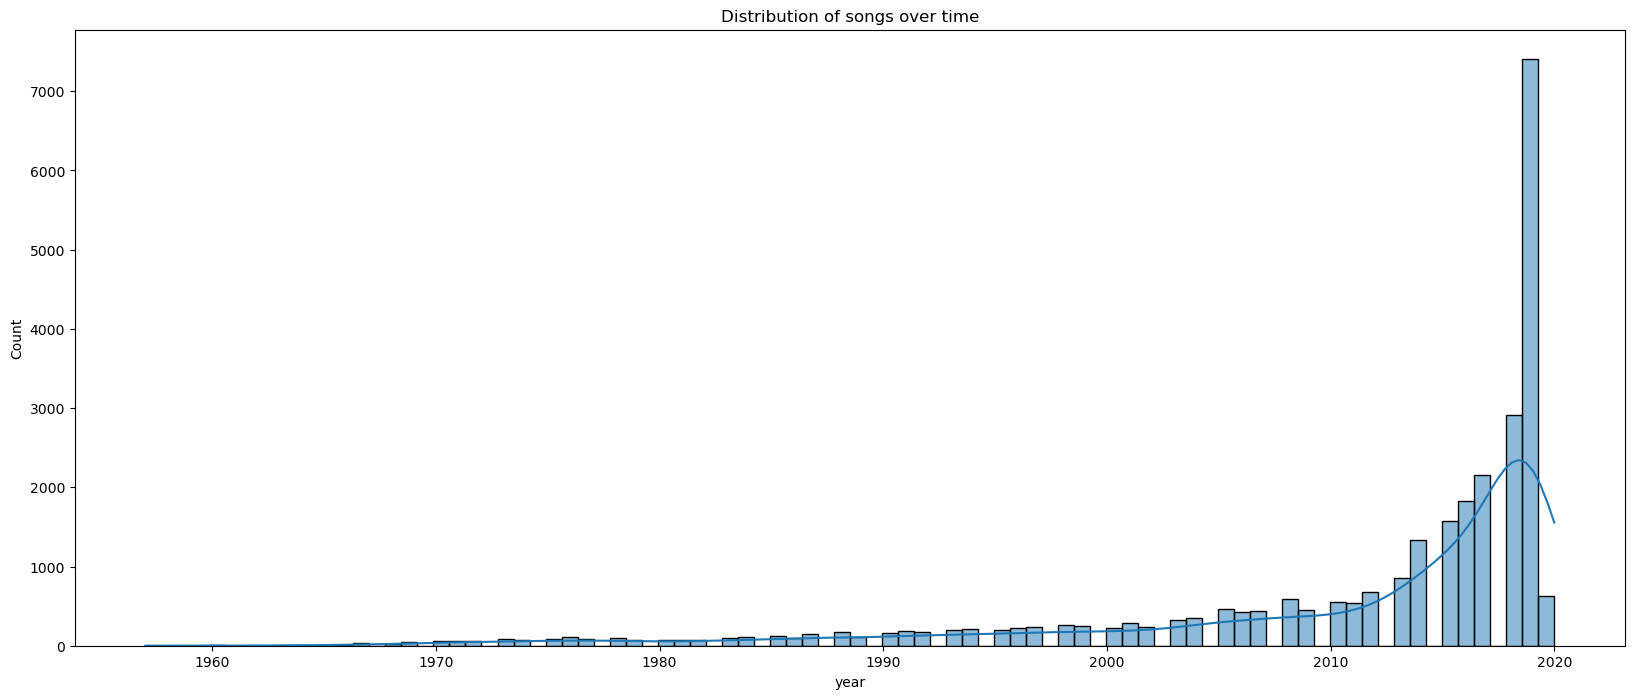

In [24]:
plt.figure(figsize=(20, 8))
sns.histplot(dfClean['year'], kde=True)
plt.title('Distribution of songs over time')
plt.show()


In [25]:
# Dropping unnacessary columns
dfClean = dfClean.drop(['track_id', 'track_album_id', 'playlist_id'], axis=1)
dfClean.head()

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019


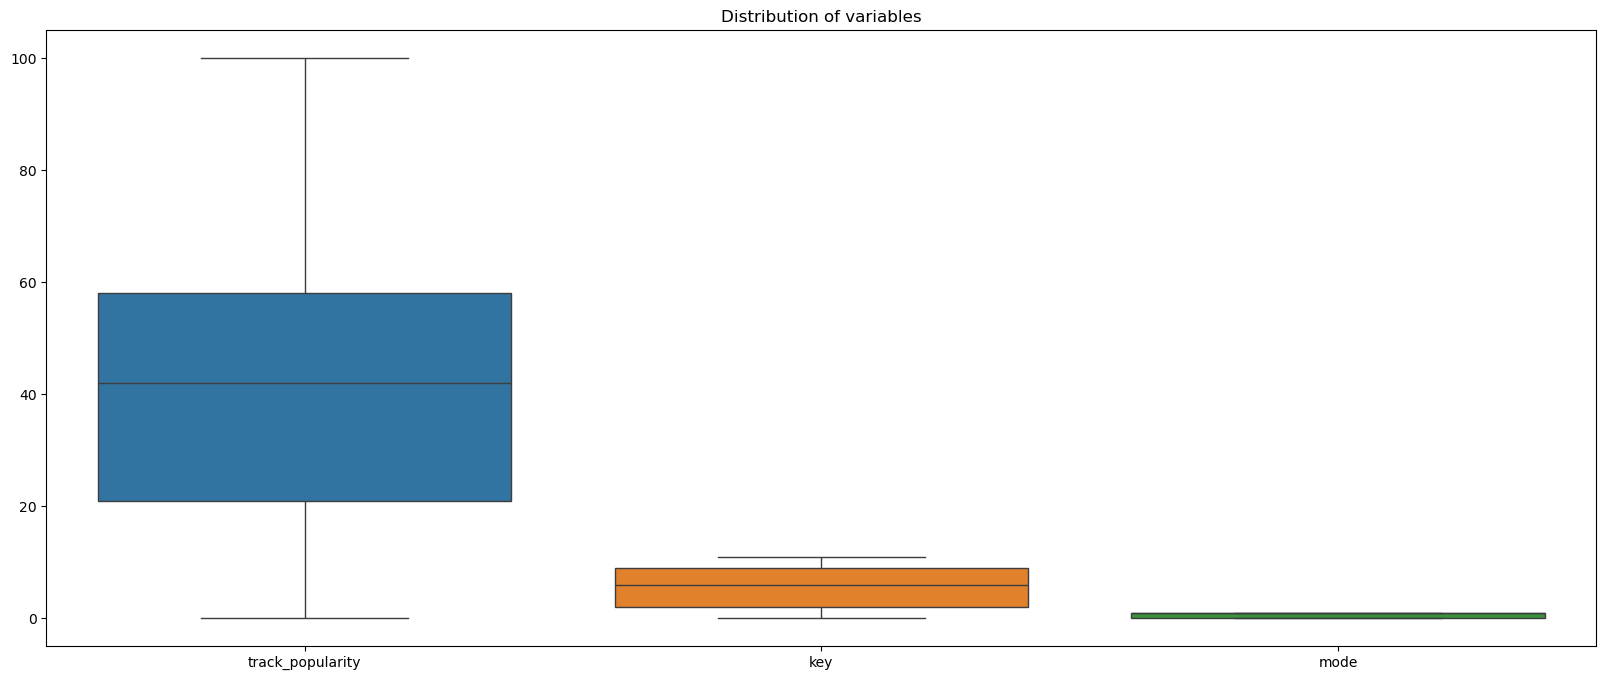

In [40]:
# checking for outliers 
plt.figure(figsize=(20, 8))
sns.boxplot(data=dfClean[['track_popularity', 'key', 'mode']])
plt.title('Distribution of variables')
plt.show()

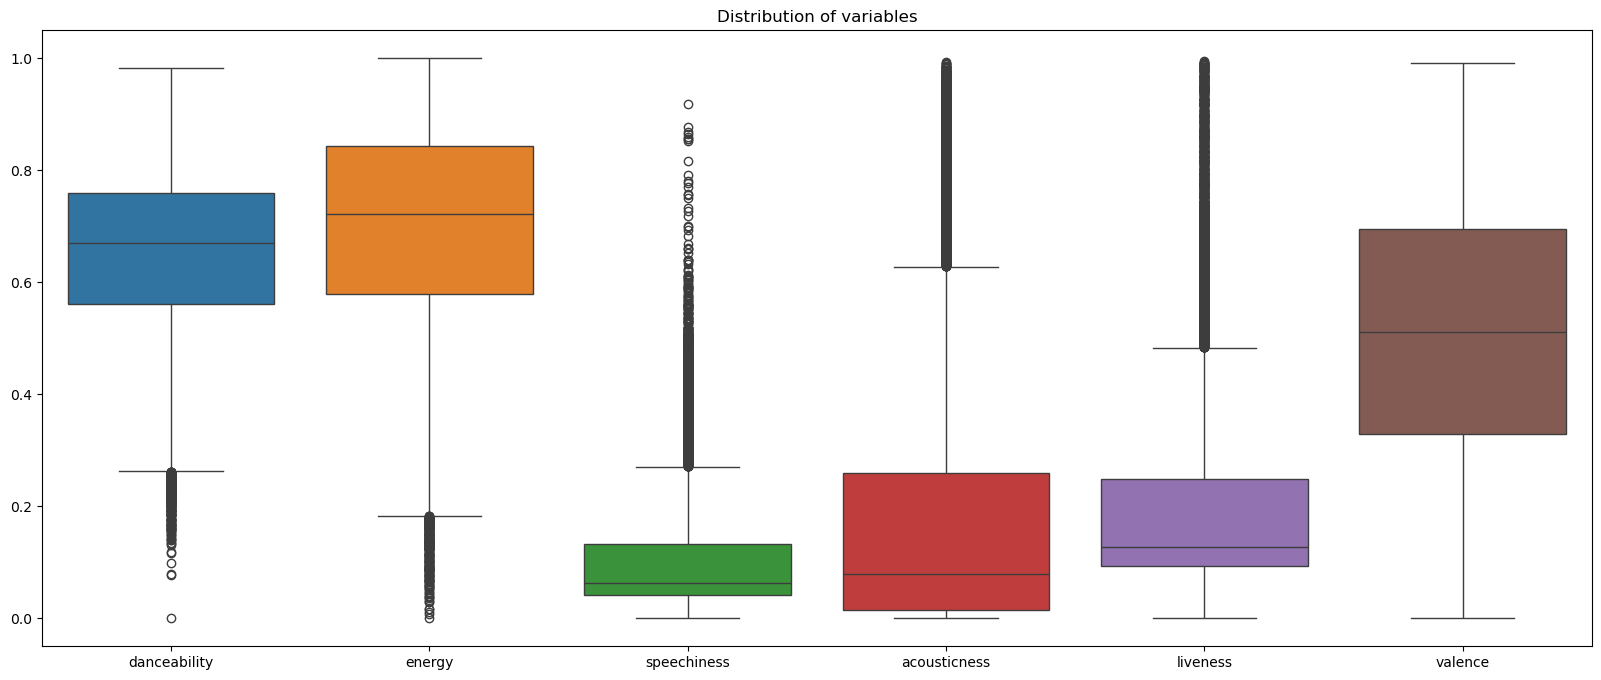

In [36]:
# checking for outliers 
plt.figure(figsize=(20, 8))
sns.boxplot(data=dfClean[['danceability', 'energy','speechiness','acousticness','liveness','valence']])
plt.title('Distribution of variables')
plt.show()

In [43]:
# List of columns to check
columns_to_check = ['danceability', 'energy','speechiness','acousticness','liveness','valence','track_popularity', 'key', 'mode', 'instrumentalness']

# Iterate over each column and print max and min values
for column in columns_to_check:
    max_value = data_for_model[column].max()
    min_value = data_for_model[column].min()
    print(f"Column: {column} - Max: {max_value}, Min: {min_value}")

Column: danceability - Max: 0.983, Min: 0.0
Column: energy - Max: 1.0, Min: 0.000175
Column: speechiness - Max: 0.918, Min: 0.0
Column: acousticness - Max: 0.994, Min: 0.0
Column: liveness - Max: 0.996, Min: 0.0
Column: valence - Max: 0.991, Min: 0.0
Column: track_popularity - Max: 100, Min: 0
Column: key - Max: 11, Min: 0
Column: mode - Max: 1, Min: 0
Column: instrumentalness - Max: 0.994, Min: 0.0


All values are inside range. Not significant outliers.

# Genre classification

## Decision tree

In [189]:
# create X dataset with all the columns of data_for_model except playlist_genre
X = data_for_model.drop('playlist_genre', axis=1)
# create dataset Y with only playlist_genre
y = data_for_model['playlist_genre']

In [190]:
# split data into train and testing
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    train_size = 0.75,
    test_size = 0.25,
    random_state=10
)

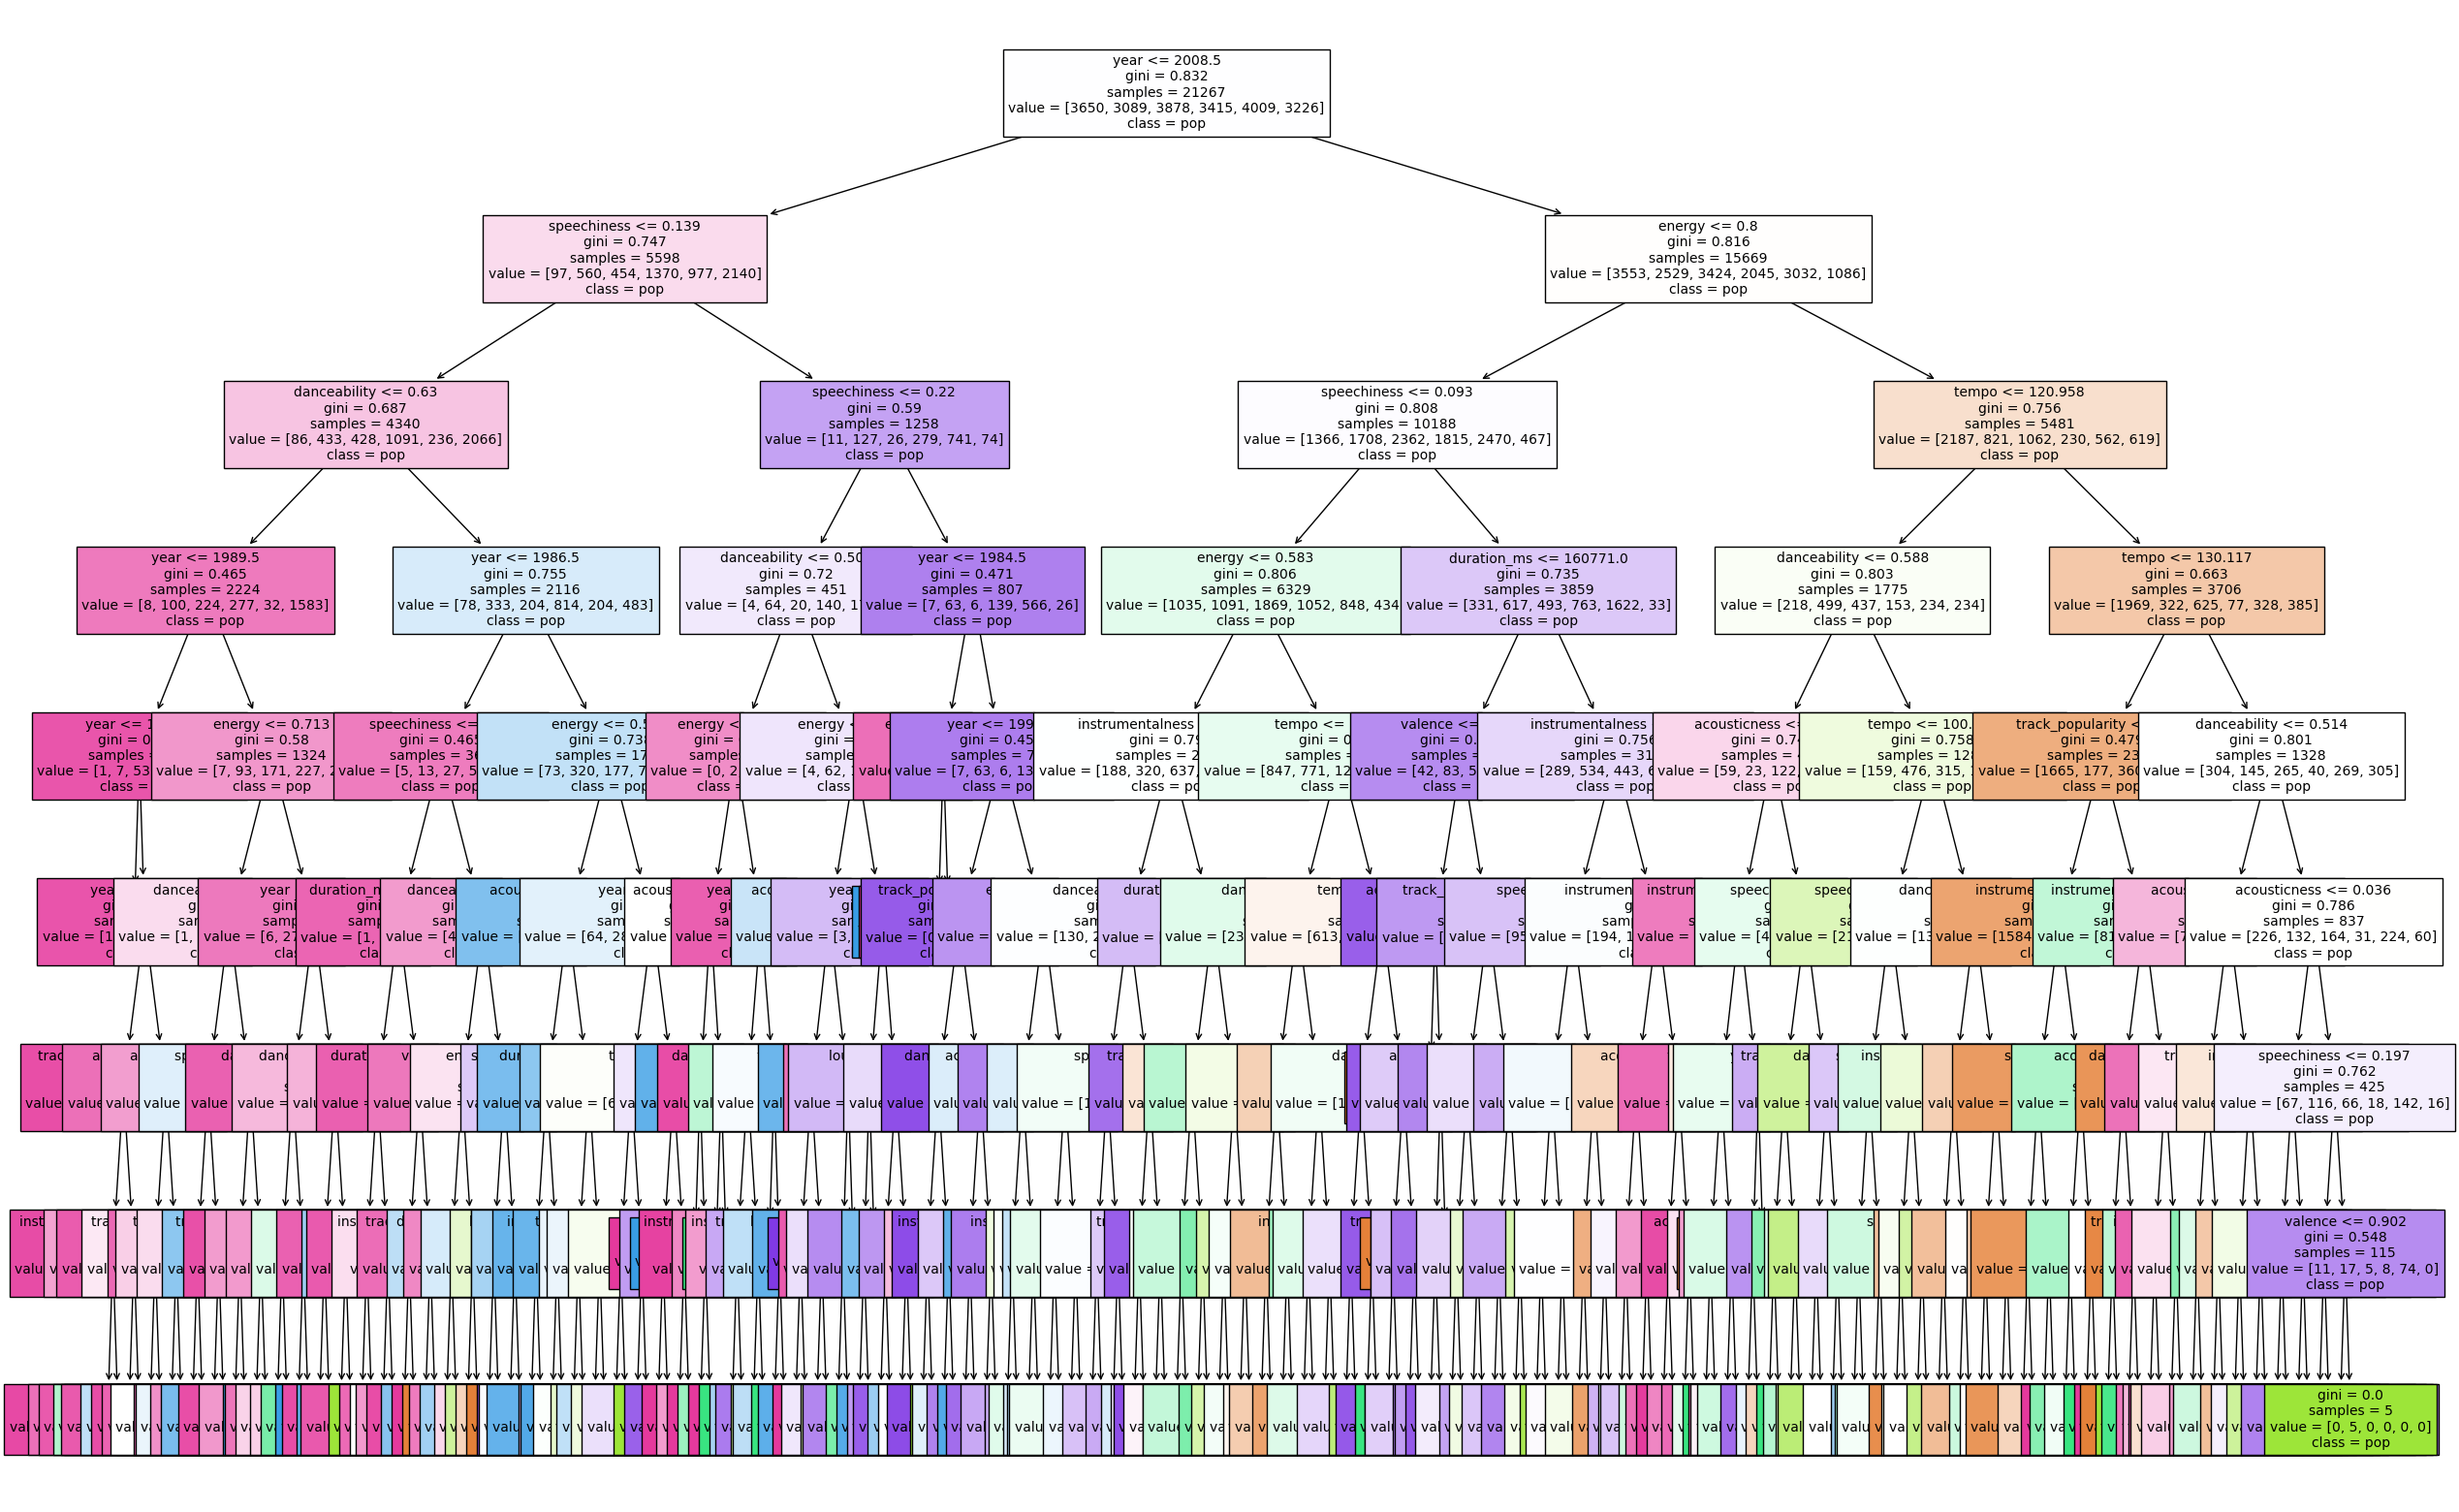

In [191]:
# Train the decision tree classifier

modelo = DecisionTreeClassifier(max_depth=8, random_state=0)
modelo.fit(X_train, y_train)

# Predict on the test set
y_pred = modelo.predict(X_test)


# Plot the decision tree
plt.figure(figsize=(30,20))
plot_tree(
    modelo,
    filled=True,
    feature_names=X_train.columns,
    class_names= dfClean.playlist_genre.values,
    fontsize=10
)
plt.show()

In [192]:
accuracy_score(y_test, y_pred)

0.5148822118775568

## Random forest

In [193]:
forestModel = RandomForestClassifier()
forestModel.fit(X_train,y_train)
y_pred = forestModel.predict(X_test)

In [194]:
accuracy_score(y_test,y_pred)

0.6130624911835237

### Cross validation to try to improve results

In [195]:
scores = cross_val_score(forestModel, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation Scores: [0.60860367 0.59920075 0.59252292 0.60874677 0.59369857]
Mean Score: 0.6005545354140903
Standard Deviation: 0.007003499053456509


## Kmeans clusterization

In [196]:
# normalize data with minmaxscaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(data_for_model)

In [197]:
for i in range (2, 10):
    # K-Means model creation (experiment with different k values)
    k = i  # Initial value for number of clusters (genres)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)

    # K-Means doesn't predict directly, but you can assign cluster labels to data points
    dfClean['predicted_genre'] = kmeans.labels_

    # Silhouette score evaluation 
    # This helps assess how well data points are separated within clusters
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    print("Silhouette Score (K=%d): %.3f" % (k, silhouette_avg))

Silhouette Score (K=2): 0.585
Silhouette Score (K=3): 0.526
Silhouette Score (K=4): 0.522
Silhouette Score (K=5): 0.520
Silhouette Score (K=6): 0.517
Silhouette Score (K=7): 0.519
Silhouette Score (K=8): 0.520
Silhouette Score (K=9): 0.519


## PCA dimensionality reduction with random forest

In [198]:
data_for_model.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,playlist_genre
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,2
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,2
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,2
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,2
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,2


In [199]:


for i in range(2, 9):   
    # Split features and labels
    X = data_for_model.drop(columns='playlist_genre')
    y = data_for_model['playlist_genre']

    # normalize data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # apply pca
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    

    # verify variance explained
    print(f'Variance explainedd by {i} main components: {np.sum(pca.explained_variance_ratio_):.2f}')

    # split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # train the model
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # preddict on the test set
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Random fores prediction accuracy: {accuracy:.2f}')

# Components impoortance
    importances = rf.feature_importances_
    for j, importance in enumerate(importances):
        print(f'Component {j+1}: {importance:.4f}')

Variance explainedd by 2 main components: 0.49
Random fores prediction accuracy: 0.30
Component 1: 0.5089
Component 2: 0.4911
Variance explainedd by 3 main components: 0.59
Random fores prediction accuracy: 0.37
Component 1: 0.3450
Component 2: 0.3363
Component 3: 0.3187
Variance explainedd by 4 main components: 0.69
Random fores prediction accuracy: 0.39
Component 1: 0.2595
Component 2: 0.2453
Component 3: 0.2429
Component 4: 0.2522
Variance explainedd by 5 main components: 0.76
Random fores prediction accuracy: 0.39
Component 1: 0.1983
Component 2: 0.1818
Component 3: 0.2093
Component 4: 0.2133
Component 5: 0.1972
Variance explainedd by 6 main components: 0.82
Random fores prediction accuracy: 0.42
Component 1: 0.1559
Component 2: 0.1433
Component 3: 0.1788
Component 4: 0.1827
Component 5: 0.1666
Component 6: 0.1727
Variance explainedd by 7 main components: 0.87
Random fores prediction accuracy: 0.47
Component 1: 0.1199
Component 2: 0.1122
Component 3: 0.1529
Component 4: 0.1467
Comp

In [200]:
dfClean.drop('predicted_genre', axis=1, inplace=True)

In [201]:
dfClean

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


## Neuronal network

In [202]:


# Define the features and target
X = dfClean[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y =dfClean['playlist_genre']

# Convert the target to categorical
# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

Epoch 1/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3986 - loss: 1.5117 - val_accuracy: 0.5007 - val_loss: 1.3025
Epoch 2/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4925 - loss: 1.3182 - val_accuracy: 0.5178 - val_loss: 1.2666
Epoch 3/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5092 - loss: 1.2960 - val_accuracy: 0.5173 - val_loss: 1.2569
Epoch 4/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5161 - loss: 1.2758 - val_accuracy: 0.5314 - val_loss: 1.2319
Epoch 5/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5190 - loss: 1.2601 - val_accuracy: 0.5407 - val_loss: 1.2220
Epoch 6/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5248 - loss: 1.2528 - val_accuracy: 0.5450 - val_loss: 1.2128
Epoch 7/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5310 - loss: 1.2349 - val_accuracy: 0.5406 - val_loss: 1.2110
Epoch 8/100
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5319 - loss: 1.2272 - val_accu

In [203]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5495 - loss: 1.1833
Test loss: 1.184
Test accuracy: 0.550


# Songs recomendation

## Using KNN

In [204]:
data_for_model

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,playlist_genre
0,66,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,2
1,67,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,2
2,70,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,2
3,60,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,2
4,69,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,0
32829,20,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,0
32830,14,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,0
32831,15,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,0


In [205]:
# drop genre for being a discrete variable that can affect distances
dewData = data_for_model.drop(columns='playlist_genre')


def recomendar_cancion(track_name):

    # normalizing features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(dewData)

    # train the model
    knn = NearestNeighbors(n_neighbors=6, metric='euclidean')
    knn.fit(scaled_features)

    # getting index from the song
    cancion_idx = dfClean.index[dfClean['track_name'] == track_name][0]

    # getting similar songs
    distances, indices = knn.kneighbors([scaled_features[cancion_idx]])

    # recomendations
    recomendaciones = dfClean.iloc[indices[0][1:]][['track_name', 'track_artist']]


    return recomendaciones


recomendar_cancion('Someone You Loved - Future Humans Remix')


,track_name,track_artist
1593,Safe And Sound,Capital Cities
292,Be Your Friend‬‬,Vigiland
4639,Bad At Love,Halsey
31357,Who You Are (feat. MIO),Syn Cole
548,Safety (feat. DJ Snake),GASHI


## Cosine similarity

In [206]:
# drop genre for being a discrete variable that can affect distances
dewData = data_for_model.drop(columns='playlist_genre')

def recomendar_cancion(track_name):
    # normalize features
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(dewData)
    
    # calculate cosine similarity
    similarity_matrix = cosine_similarity(scaled_features)
    
    # get song index
    cancion_idx = dfClean.index[dfClean['track_name'] == track_name][0]
    
    # find similarity scores
    similarity_scores = list(enumerate(similarity_matrix[cancion_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # get index from similar songs
    similar_indices = [i[0] for i in similarity_scores[1:6]]
    
    # recomendations
    recomendaciones = dfClean.iloc[similar_indices][['track_name', 'track_artist']]
    
    return recomendaciones

recomendar_cancion('Someone You Loved - Future Humans Remix')

,track_name,track_artist
548,Safety (feat. DJ Snake),GASHI
292,Be Your Friend‬‬,Vigiland
4568,Call on Me - Ryan Riback Remix,Starley
4492,Sweet Talk,Saint Motel
4114,Cardiac Arrest,Bad Suns


## Recomendation with Autoencoder (Neuronal network)

In [207]:


scaler = MinMaxScaler()
features = scaler.fit_transform(data_for_model)

# Difining autoencoder
input_dim = features.shape[1]  # number of features
encoding_dim = 10  

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# trinning encoder
autoencoder.fit(features, features, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1021 - val_loss: 0.0877
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0656 - val_loss: 0.0699
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0474 - val_loss: 0.0597
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0394 - val_loss: 0.0512
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0331 - val_loss: 0.0441
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - val_loss: 0.0382
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0249 - val_loss: 0.0338
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220 - val_loss: 0.0298
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0196 - val_loss: 0.0267
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 - val_loss: 0.0242
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0160 - val_loss: 0.0221
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0148 - val_lo

In [208]:

# getting codify vector from a song
encoder = models.Model(input_layer, encoded)
encoded_songs = encoder.predict(features)

# getting codify vector from a song by name
def recommend_songs_by_name(song_name, n_recommendations=5):
    # getting de song index from the dataset
    song_index = dfClean.index[dfClean['track_name'] == song_name].tolist()[0]
    
    # calculate euclidian distance between the song and all others
    distances = np.linalg.norm(encoded_songs - encoded_songs[song_index], axis=1)
    
    # getting the index of the closest songs
    recommended_indices = np.argsort(distances)[1:n_recommendations+1]
    return dfClean.iloc[recommended_indices]

# recommending 5 similar songs
song_name = "Call You Mine - Keanu Silva Remix"
recommended_songs = recommend_songs_by_name(song_name,)
print(recommended_songs[['track_name', 'track_artist']])

887/887 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step
                                    track_name   track_artist
28                  So Am I - Toby Green Remix        Ava Max
306                                 Solo Dance  Martin Jensen
174   Better Off Without You (feat. Shift K3Y)     Becky Hill
484                                       WANT         TAEMIN
3885                                 You And I           LÉON


# Conclusion

In this project, we set out to clean and prepare a dataset of 30,000 Spotify songs, build a genre prediction model, and develop a song recommendation system using machine learning and neural network techniques.

Genre Prediction Model
After experimenting with various machine learning algorithms, we found that the Random Forest model achieved the highest accuracy for genre prediction, \
with a performance of 61% accuracy. Despite trying different optimization techniques, including hyperparameter tuning and cross-validation, \
this was the best result we obtained. Our analysis suggests that to further improve the accuracy of genre prediction, we would require more diverse and informative features.\
 The current features in the dataset show limited correlation with the target variable, highlighting the need for additional data that could better capture the nuances of musical genres.

Song Recommendation Model
For the song recommendation system, we tested multiple approaches to measure similarities between songs. \
Among the methods we evaluated, k-Nearest Neighbors (k-NN) with Euclidean distance provided the most promising results. \
Although the performance of the recommendation model can vary based on the distance metric used, k-NN consistently showed better results with Euclidean distance in our experiments.

Overall, our project demonstrated the potential and challenges of using machine learning for music genre classification and song recommendation.\
 While we achieved a modest level of accuracy in genre prediction, our findings indicate that more comprehensive features are crucial for significant improvements. \
 In contrast, the song recommendation model showed more consistent performance, offering a solid foundation for further enhancements.

Through this project, we gained valuable insights into the application of machine learning in music analysis and recommendation systems. \
Future work could involve exploring additional features, employing advanced neural network architectures, and leveraging larger datasets to further refine and improve the models.

In [25]:
#exportar dfclean
dfClean.to_csv('dfClean.csv')